# AyVD- Año 2022

# GRUPO 1- Trabajo práctico entregable parte N°1- Ejercicio 1
********************************************************************************

Integrantes: 


*   Laura Ailin Feu Marquestau
*   Matias Miguel Mengual Figueroa 
*   Marcelo Perea
*   Natalia Giselle Tassin
*   Ignacio Villagra Torcomian



# CONSIGNA EJERCICIO 1 - Análisis descriptivo

Responder a la pregunta: 
**¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**
*******************************************************************************

Para ello: 

1.   Seleccionar las columnas relevantes para analizar
2.   Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  *   Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  *    Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.
******************************************************************************


    
   




In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

seaborn.set_context('talk')

In [ ]:
#Lectura del dataset
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df.shape

(6095, 48)

#  1. Selección de columnas relevantes para el análisis
*******************************************************************************

En una primera instancia, se decidió estudiar la información referida a los salarios de los programadores en 2020 tanto de la columna de "sueldo neto" como de "sueldo bruto", llamadas `'salary_monthly_NETO'` y `'salary_monthly_BRUTO'` respectivamente en el dataframe. 

Este primer paso tiene como objetivo analizar si es pertinente trabajar con ambas variables (NETO y BRUTO) o sólo con la columna de sueldo NETO.

Por otro lado, también se ha seleccionado la columna que contiene información sobre los lenguajes de programación utilizados por los programadores encuestados llamada: `'tools_programming_languages'`. Sus valores son strings con los lenguajes seleccionados separados por comas. 

In [ ]:
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO', 'salary_monthly_BRUTO']

# 2.   Seleccionar las filas relevantes para analizar
*******************************************************************************

Este paso incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población.

Se trabaja inicialmente con el dataframe original (df) para el estudio de las columnas de salario ya que se considera que de esta manera "no se distorsiona" la distribución y cantidad original de los datos.


In [ ]:
salary_neto= 'salary_monthly_NETO'
salary_bruto= 'salary_monthly_BRUTO'
programming_languages= 'tools_programming_languages'

Para poder seleccionar las filas relevantes para el análisis, se exploran los datos de las variables salary_neto y salary_bruto, visualizándolos a través de un histograma, para poder detectar outliers o valores erróneos.

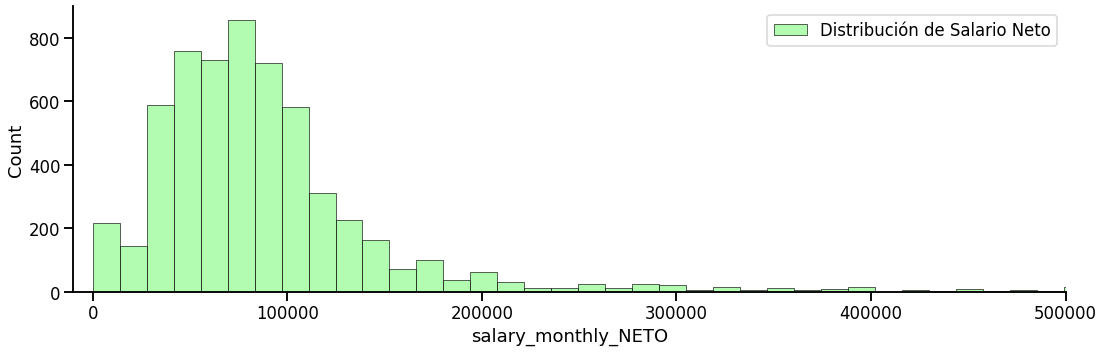

In [ ]:
#VISUALIZACIÓN DE DATOS INICIAL: Histograma de columna "salary_neto"
seaborn.displot(df["salary_monthly_NETO"], aspect=3, bins = 150, color='palegreen', label='Distribución de Salario Neto') 
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(-10000,500000)
plt.legend()

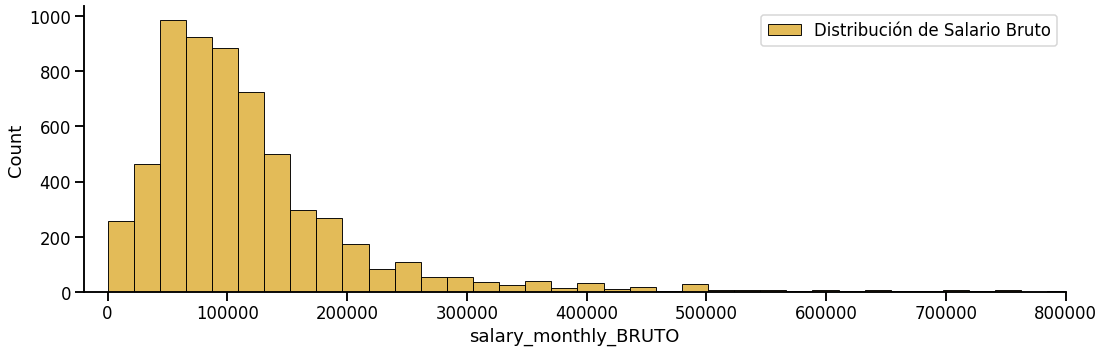

In [ ]:
#VISUALIZACIÓN DE DATOS INICIAL: Histograma de columna "salary_bruto"
seaborn.displot(df["salary_monthly_BRUTO"], aspect=3, bins = 100, color='goldenrod', label='Distribución de Salario Bruto') 
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(-20000,800000)
plt.legend()

Si se analizan ambos histogramas, podemos ver que ambas distribuciones tienen una cola derecha (sesgo hacia la izquierda), es decir que tienen la mayoría de las frecuencias en el lado inferior del eje X. 

Asimismo, hay menor cantidad de elementos y frecuencias bajas en el valor superior del eje X (con salarios muy elevados).

*******************************************************************************
Se estudia a continuación la **estadística descriptiva** de las dos columnas numéricas de salarios neto y bruto:

In [ ]:
#ESTADISTICA DESCRIPTIVA DE COLUMNAS DE SALARIO NETO Y BRUTO
df[['salary_monthly_NETO', 'salary_monthly_BRUTO']].describe().round()

,salary_monthly_NETO,salary_monthly_BRUTO
count,5883.0,6095.0
mean,94908.0,124059.0
std,96862.0,122912.0
min,1.0,1.0
25%,51480.0,61595.0
50%,78000.0,96000.0
75%,106000.0,145000.0
max,2080000.0,2180000.0


Según la tabla anterior, se puede ver que las columnas de sueldo neto y bruto NO coinciden, siendo menor la cantidad de respuestas numéricas en la columna de sueldo neto (5883 versus 6095). Es decir que hubo 212 respuestas nulas en la encuesta tomada de base.

El valor máximo para la columna de salario neto es 2.080.000 pesos y el máximo de la columna de salario bruto es 2.180.000 pesos. 

Los valores mínimos para ambos salarios son 1.0 peso, información que se sospecha que es errónea.

In [ ]:
df["salary_monthly_NETO"].median()
print(df["salary_monthly_NETO"].median())

df["salary_monthly_BRUTO"].median()
print(df["salary_monthly_BRUTO"].median())

78000.0
96000.0


*   Los valores de media y mediana para la columna de sueldo neto son 94.908 pesos y 78.000 pesos respectivamente.
*   Los valores de media y mediana para la columna de sueldo bruto son 124.059 y 96.000 pesos respectivamente.

La media es muy sensible a valores extremos y la mediana es más robusta frente a este tipo de valores.

Se observa que la distribución de los datos es asimétrica, ya que estas dos medidas son muy diferentes (acompañando esta conclusión con la visualización de los histogramas previos).

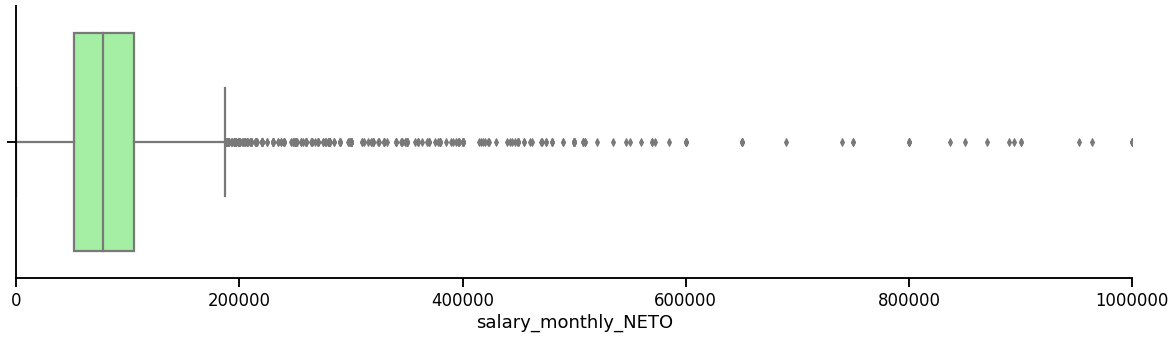

In [ ]:
#VISUALIZACIÓN DE DATOS: Boxplot para columna de SALARIO NETO
plt.figure(figsize=(20, 5))
seaborn.boxplot(x=df["salary_monthly_NETO"], color='palegreen')
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0,1000000)
seaborn.despine()

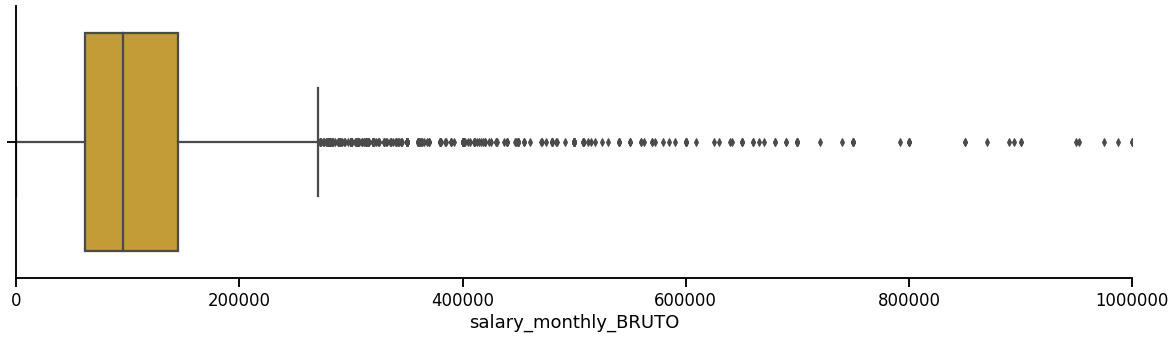

In [ ]:
#VISUALIZACIÓN DE DATOS: Boxplot para columna de SALARIO BRUTO
plt.figure(figsize=(20, 5))
seaborn.boxplot(x=df["salary_monthly_BRUTO"], color='goldenrod')
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0,1000000)
seaborn.despine()

En los gráficos de caja se observa esta distribución asimétrica (cola hacia la derecha) con la presencia de muchos valores "outliers" del lado derecho.

*******************************************************************************
Las **medidas de tendencia central** representan cómo es la distribución de los datos (en torno a la media y mediana) considerando diferentes valores máximos:

In [ ]:
#Medidas de tendencia central para la columna de SALARIO NETO
max_salaries = [df[salary_neto].max(), 10**6, 800000, 600000,400000, 300000, 200000, 150000, 100000, 90000, 80000]
central_tendency = [
    (max_salary, df[df[salary_neto] < max_salary][salary_neto].mean(),
     df[df[salary_neto] < max_salary][salary_neto].median())
    for max_salary in max_salaries
]
central_tendency

[(2080000.0, 94570.46320401224, 77900.0),
 (1000000, 92698.81889747956, 77522.5),
 (800000, 91104.13729795223, 77050.0),
 (600000, 89935.06234028729, 77000.0),
 (400000, 85670.75178384922, 76000.0),
 (300000, 82071.23510452473, 75000.0),
 (200000, 77205.32366377127, 74824.5),
 (150000, 72210.03814321179, 72000.0),
 (100000, 59763.166367996084, 62000.0),
 (90000, 55124.48706229143, 57077.979999999996),
 (80000, 49693.69284872559, 52000.0)]

In [ ]:
#Para visualizar en forma gráfica la tabla anterior. Se calcula la tendencia central máxima del SALARIO NETO

central_tendency_max = [
    (max_salary, df[df[salary_neto] < max_salary][salary_neto].mean(),
     df[df[salary_neto] < max_salary][salary_neto].median())
    for max_salary in range(50000, int(df[salary_neto].max()), 10**4)
]
central_tendency_max_SN_df = pd.DataFrame(central_tendency_max,
                                   columns=['max_salary_NETO', 'mean', 'median'])\
  .melt(id_vars='max_salary_NETO', var_name='metric')

central_tendency_max_SN_df.head()

,max_salary_NETO,metric,value
0,50000,mean,31760.877295
1,60000,mean,38301.665653
2,70000,mean,44085.591719
3,80000,mean,49693.692849
4,90000,mean,55124.487062


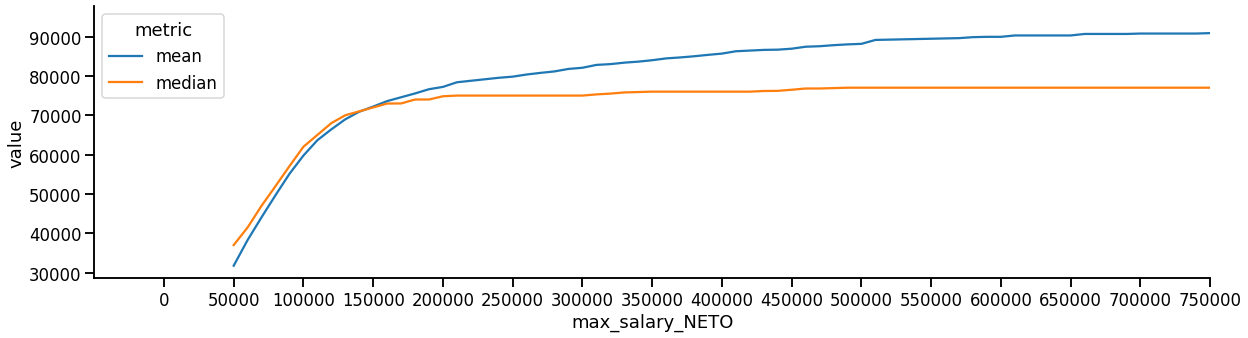

In [ ]:
#A continuación se realiza la representación gráfica de la MEDIA y la MEDIANA para el SALARIO NETO
fig = plt.figure(figsize=(20, 5))
seaborn.lineplot(data=central_tendency_max_SN_df, x='max_salary_NETO', y='value', hue='metric')
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(-50000,350000)
plt.xticks( range(0,800000,50000) )
seaborn.despine()

A simple vista, se observa que a partir de un valor de salario NETO de 150.000 pesos, los valores de media y mediana se alejan de manera significativa. 

In [ ]:
#Medida de tendencia central para la columna de SALARIO BRUTO
max_salaries = [df[salary_bruto].max(), 10**6, 800000, 600000,400000, 300000, 200000, 175000, 150000, 140000, 100000, 90000, 80000]
central_tendency = [
    (max_salary, df[df[salary_bruto] < max_salary][salary_bruto].mean(),
     df[df[salary_bruto] < max_salary][salary_bruto].median())
    for max_salary in max_salaries
]
central_tendency

[(2180000.0, 123721.17819855602, 96000.0),
 (1000000, 120723.13043954605, 96000.0),
 (800000, 118841.94754980213, 96000.0),
 (600000, 115230.51949244818, 95000.0),
 (400000, 107991.96966661021, 94000.0),
 (300000, 102223.41686622657, 92000.0),
 (200000, 91461.11102857142, 88000.0),
 (175000, 86340.4693517159, 85000.0),
 (150000, 79580.67606806853, 80000.0),
 (140000, 76235.35873789951, 76000.0),
 (100000, 60116.26495582583, 62950.0),
 (90000, 55024.03194313148, 59000.0),
 (80000, 49864.62583202786, 53000.0)]

In [ ]:
#Para visualizar en forma gráfica la tabla anterior. Se calcula la tendencia central máxima del SALARIO BRUTO

central_tendency_max = [
    (max_salary, df[df[salary_bruto] < max_salary][salary_bruto].mean(),
     df[df[salary_bruto] < max_salary][salary_bruto].median())
    for max_salary in range(50000, int(df[salary_bruto].max()), 10**4)
]
central_tendency_max_SB_df = pd.DataFrame(central_tendency_max,
                                   columns=['max_salary_BRUTO', 'mean', 'median'])\
  .melt(id_vars='max_salary_BRUTO', var_name='metric')

central_tendency_max_SB_df.head()

,max_salary_BRUTO,metric,value
0,50000,mean,30339.534775
1,60000,mean,37032.451850
2,70000,mean,44179.526605
3,80000,mean,49864.625832
4,90000,mean,55024.031943


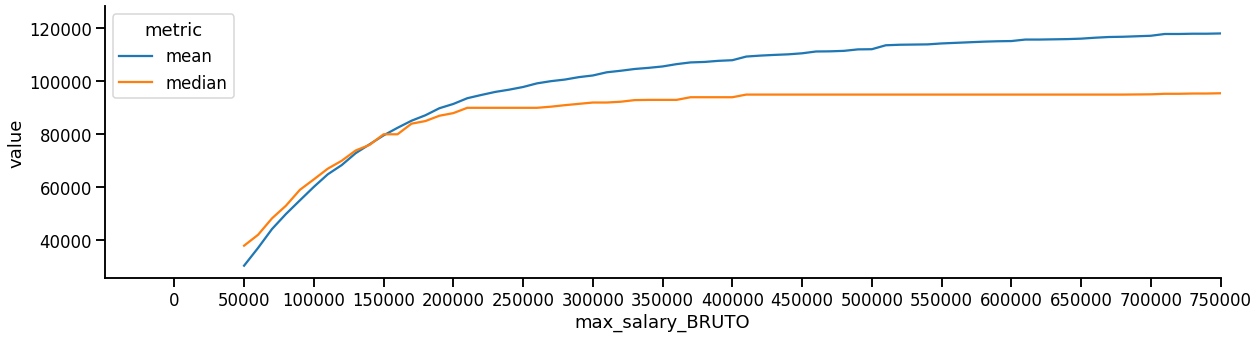

In [ ]:
# A continuación se realiza la representación gráfica de la MEDIA y la MEDIANA para el SALARIO BRUTO
fig = plt.figure(figsize=(20, 5))
seaborn.lineplot(data=central_tendency_max_SB_df, x='max_salary_BRUTO', y='value', hue='metric')
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(-50000,750000)
plt.xticks( range(0,800000,50000) )
seaborn.despine()

Las líneas de código previas muestran las diferencias en los valores calculados de la media y la mediana para los sueldos, considerando diversos valores "máximos" para los cálculos. 

Da una idea de la distribución de los datos y a partir de qué valores máximos de salarios, la media y la mediana se comienzan a acercar, dando una distribución más simétrica de los datos.

En ambos gŕaficos se observa que a partir de un sueldo de 150.000 pesos aproximadamente, los valores de la media y la mediana se alejan.
********************************************************************************


**Cálculo de percentiles** para las columnas de sueldo neto y bruto:

In [ ]:
df['salary_monthly_NETO'].quantile([.03, .04, 0.045, 0.05, .10, .90, .95, .96, .97, .99, .995, .998])

0.030      1046.00
0.040     16000.00
0.045     20000.00
0.050     22500.00
0.100     35000.00
0.900    150000.00
0.950    210000.00
0.960    250720.00
0.970    300000.00
0.990    491800.00
0.995    650000.00
0.998    955289.52
Name: salary_monthly_NETO, dtype: float64

In [ ]:
df['salary_monthly_BRUTO'].quantile([0.6, 0.7, 0.73, 0.75, 0.8, 0.83, 0.85, 0.88, .90, .955, .98, .99, .995, .998])

0.600     112739.394
0.700     133632.000
0.730     140000.000
0.750     145000.000
0.800     160000.000
0.830     175000.000
0.850     180573.500
0.880     200000.000
0.900     220000.000
0.955     320842.410
0.980     480000.000
0.990     630600.000
0.995     796240.000
0.998    1032671.000
Name: salary_monthly_BRUTO, dtype: float64

CONCLUSIÓN DEL USO DE TODAS LAS HERRAMIENTAS ESTADÍSTICAS:
********************************************************************************

Analizando ambos gráficos de tendencia central del SUELDO BRUTO y SUELDO NETO (junto con los percentiles) se observa que utilizando un percentil 90 en el SUELDO NETO (150.000 pesos como sueldo máximo) podríamos trabajar con datos con menor dispersión (en el gráfico, la mediana y media son muy similares).

Sin embargo, para trabajar con datos menos dispersos en el SUELDO BRUTO deberíamos trabajar con un percentil menor a k=0.75 (alrededor de 140.000 pesos como valor máximo de sueldo), dejando afuera una cantidad importante de datos. 

**Es por ello que se concluye que el SUELDO NETO sería una mejor variable para continuar con el análisis y se continúa sólo con esta columna de datos de acá en adelante.**
*******************************************************************************

#2. a) Definición de valor mínimo para el Sueldo Neto
********************************************************************************

Luego de analizar la información presentada previamente junto con los gráficos, se consideran estos criterios para la selección de filas relevantes:

*   Considerar un “sueldo piso” para las columnas de sueldo neto segun el salario Minimo, Vital y Movil del año 2020 que fue ($20.587,50) a partir del 1/12/20. Entonces como valor mínimo se tomará un sueldo neto de 20.000 pesos.

*   IMPORTANTE: Los sueldos menores a ese valor **NO** se tendrán en cuenta para el análisis. Estos valores pueden estar dolarizados, o simplemente pueden haber sido cargados erróneamente.



In [ ]:
#Selección de valor mínimo para la columna de Salario NETO

#El valor mínimo es el salario Mínimo Vital y Móvil de 2020 y coincide con el percentil 0.045 de la columna salario neto.
df['salary_monthly_NETO'].quantile(.045)
min_limit = df['salary_monthly_NETO'].quantile(.045)
print(min_limit)

20000.0


In [ ]:
# Se define el nuevo dataframe (df_modif) a analizar incluyendo sólo los valores superiores al límite inferior
df_modif = df[(df['salary_monthly_NETO'] >= min_limit)]

In [ ]:
print(df.shape)
print(df_modif.shape)

(6095, 48)
(5624, 48)


Eliminando los **sueldos menores a 20.000 pesos**, la cantidad de datos a analizar disminuye de 6095 a 5624 respuestas.
*******************************************************************************

In [ ]:
#Medidas de tendencia central para la columna de SALARIO NETO con el DATAFRAME MODIFICADO
max_salaries = [df_modif[salary_neto].max(), 10**6, 800000, 600000,400000, 300000, 200000, 150000, 130000, 100000, 90000, 80000]
central_tendency = [
    (max_salary, df_modif[df_modif[salary_neto] < max_salary][salary_neto].mean(),
     df_modif[df_modif[salary_neto] < max_salary][salary_neto].median())
    for max_salary in max_salaries
]
central_tendency

[(2080000.0, 98742.02572114531, 80000.0),
 (1000000, 96791.450317121, 80000.0),
 (800000, 95131.7962203178, 80000.0),
 (600000, 93917.19281266775, 80000.0),
 (400000, 89499.80152606807, 79947.5),
 (300000, 85785.98725519016, 78000.0),
 (200000, 80804.92968103284, 76000.0),
 (150000, 75758.7215387706, 74000.0),
 (130000, 72531.21244867727, 72000.0),
 (100000, 63535.79075496343, 64000.0),
 (90000, 59092.179065028475, 60000.0),
 (80000, 53978.1289500362, 54518.0)]

In [ ]:
#Para visualizar en forma gráfica la tabla anterior. Se calcula la tendencia central máxima del SALARIO NETO con el DATAFRAME MODIFICADO

central_tendency_max = [
    (max_salary, df_modif[df_modif[salary_neto] < max_salary][salary_neto].mean(),
     df_modif[df_modif[salary_neto] < max_salary][salary_neto].median())
    for max_salary in range(50000, int(df[salary_neto].max()), 10**4)
]
central_tendency_max_SN_df = pd.DataFrame(central_tendency_max,
                                   columns=['max_salary_NETO', 'mean', 'median'])\
  .melt(id_vars='max_salary_NETO', var_name='metric')

central_tendency_max_SN_df.head()

,max_salary_NETO,metric,value
0,50000,mean,38368.426268
1,60000,mean,43711.578849
2,70000,mean,48817.184389
3,80000,mean,53978.128950
4,90000,mean,59092.179065


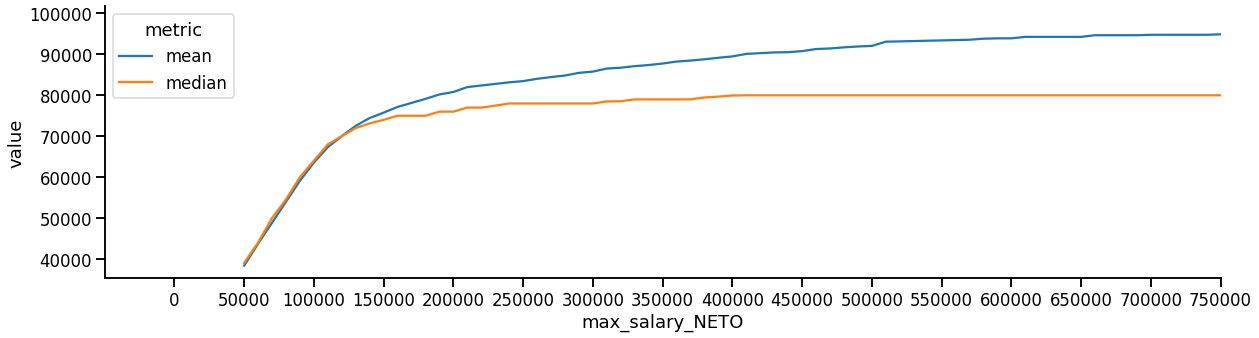

In [ ]:
#A continuación se realiza la representación gráfica de la MEDIA y la MEDIANA para el SALARIO NETO con el DATAFRAME MODIFICADO
fig = plt.figure(figsize=(20, 5))
seaborn.lineplot(data=central_tendency_max_SN_df, x='max_salary_NETO', y='value', hue='metric')
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(-50000,350000)
plt.xticks( range(0,800000,50000) )
seaborn.despine()

In [ ]:
#CÁLCULO DE PERCENTILES PARA LA COLUMNA DE SALARIO NETO EN EL DATAFRAME MODIFICADO
df_modif['salary_monthly_NETO'].quantile([.03, .04, 0.045, 0.05, .10, 0.85, .90, .95, .96, .97, .99, .995, .998])

0.030     31000.00
0.040     32900.00
0.045     33400.00
0.050     34500.00
0.100     40000.00
0.850    130000.00
0.900    155940.00
0.950    220000.00
0.960    260000.00
0.970    300000.00
0.990    500000.00
0.995    650000.00
0.998    961412.28
Name: salary_monthly_NETO, dtype: float64

# 2. b) Definición de valor máximo para el Sueldo Neto
*******************************************************************************

*   Se analizaron los percentiles junto con las medidas de tendencia central en el df_modif y el objetivo fue definir algún percentil "k" para tomar como valor máximo. En este caso, una vez definido el valor máximo, **SI** nos interesa estudiar la subpoblación de programadores que cobran por encima de ese límite superior.

*   Se considera el percentil k=0.85 (130.000 pesos) como límite máximo ya que definiendo ese valor límite se tiene una distribución simétrica de los datos, siendo el valor de la media 72.531 pesos y la mediana 72.000 pesos (según las medidas de tendencia central mostradas previamente).

En el análisis anexo del final, se estudiará cómo es la relación de los sueldos/lenguajes de programación de la subpoblación de programadores que ganan más de 130.000 pesos. 
*******************************************************************************



In [ ]:
#Selección de valor máximo para la columna de Salario NETO
#Se elige como valor máximo el percentil 0.90 de esa columna
df_modif['salary_monthly_NETO'].quantile(.85)
max_limit = df_modif['salary_monthly_NETO'].quantile(.85)
print(max_limit)


130000.0


In [ ]:
# Se define el nuevo dataframe (df_modif) a analizar incluyendo solo los valores entre el límite inferior y el límite superior de salario Neto
df_modif = df[(df['salary_monthly_NETO'] >= min_limit) & (df['salary_monthly_NETO'] <= max_limit)]

In [ ]:
print(df.shape)
print(df_modif.shape)

(6095, 48)
(4801, 48)


Eliminando los sueldos mayores a 130.000 pesos (para analizarlos posteriormente) y los sueldos menores a 20.000 pesos, la cantidad de datos a analizar disminuye de 6095 a 4801 respuestas.
********************************************************************************

In [ ]:
#Cálculo nuevamente de las medidas estadísticas para el df modif
df_modif[['salary_monthly_NETO']].describe().round()

,salary_monthly_NETO
count,4801.0
mean,73441.0
std,27003.0
min,20000.0
25%,51000.0
50%,72500.0
75%,94000.0
max,130000.0


In [ ]:
df_modif["salary_monthly_NETO"].median()
print(df_modif["salary_monthly_NETO"].median())

72500.0


Se observa que en el dataframe modificado (df_modif) con los valores límites para el sueldo neto, la media y la mediana asumen valores similares (73.441 pesos versus 72.500 pesos) dando una idea de una distribución más simétrica que la original.

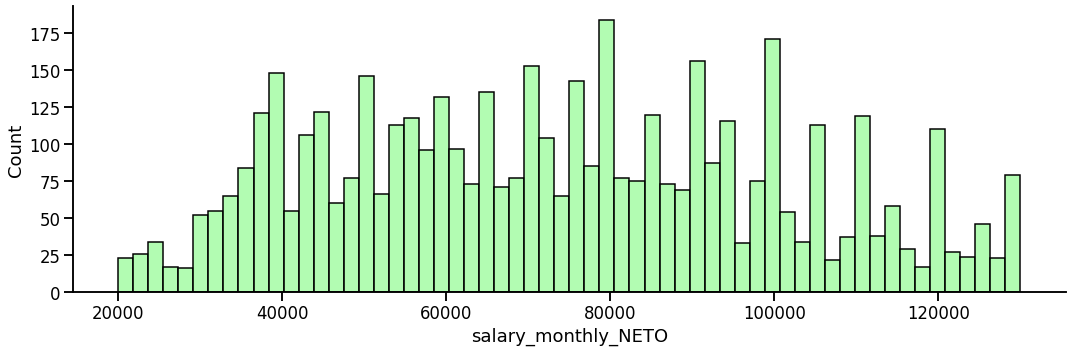

In [ ]:
#VISUALIZACIÓN DE DATOS: Histograma de columna "salary_neto" en df modif
seaborn.displot(df_modif["salary_monthly_NETO"], aspect=3, bins = 60, color='palegreen') 
plt.ticklabel_format(style='plain', axis='x')

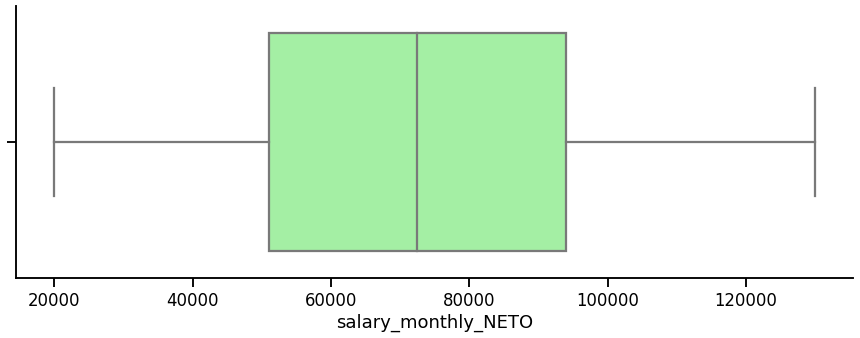

In [ ]:
#Gráfico de caja para sueldo neto en df modif
plt.figure(figsize=(15, 5))
seaborn.boxplot(x=df_modif["salary_monthly_NETO"], color='palegreen')
plt.ticklabel_format(style='plain', axis='x')
seaborn.despine()

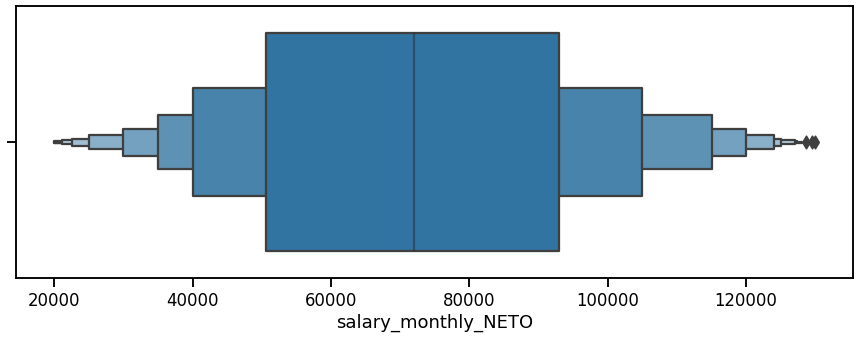

In [ ]:
#Otra visualización de más percentiles
plt.figure(figsize=(15, 5))
max_limit = df_modif[salary_neto].quantile(.99)
seaborn.boxenplot(x=df_modif[df_modif[salary_neto] < max_limit][salary_neto])

# 2. c) Lenguajes de programación más populares
*************************************************

La otra columna de interés es **tools_programming_languages**. Sus valores son strings con los lenguajes seleccionados separados por comas. 

A continuación, se separan estos lenguajes de programación (creando un nuevo dataframe, denominado "df_lang") ya que luego será de interés contar la frecuencia con la que aparecen para poder confeccionar una lista de lenguajes "populares".

In [ ]:
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df_modif.loc[:, 'cured_programming_languages'] = df_modif.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df_modif.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df_modif[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [ ]:
#Con esta línea de código sólo queremos visualizar las 2 columnas que seleccionamos de interés.
df_lang[["salary_monthly_NETO", "programming_language"]]

,salary_monthly_NETO,programming_language
0,43000.0,ninguno
1,63000.0,html
1,63000.0,javascript
1,63000.0,python
2,127000.0,ninguno
...,...,...
6090,97000.0,html
6090,97000.0,javascript
6090,97000.0,php
6090,97000.0,sql


In [ ]:
print(df_modif.shape)
print(df_lang.shape)

(4801, 49)
(13765, 4)


Con las líneas de código anterior se puede ver que si se compara el tamaño del dataFrame modificado con los límites superior e inferior (df_modif) con el que se acaba de crear separando los lenguajes de programación de quienes manejan más de 1 lenguaje (df_lang) se puede visualizar cómo la cantidad de filas se incrementó desde 4801 respuestas originales en la encuesta a 13765 respuestas.

Esto da indicio de que muchos de los programadores encuestados manejan 2 o más lenguajes de programación.
*************************************************

In [ ]:
df_lang.head()

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,ninguno,Ninguno,43000.0,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,[ninguno]


In [ ]:
# Se busca visualizar cuáles son los tipos de lenguajes de programación que manejan los encuestados
df_lang['programming_language'].value_counts() 

javascript    1913
sql           1742
html          1465
java          1107
python        1086
              ... 
asp              1
kdb              1
adabas           1
natural          1
infobasic        1
Name: programming_language, Length: 179, dtype: int64

El listado muestra 179 lenguajes de programación diferentes que manejan los programadores encuestados.

In [ ]:
# Se quiere obtener los 20 lenguajes de programación más populares
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:20]

,language,frequency
0,javascript,1913
1,sql,1742
2,html,1465
3,java,1107
4,python,1086
5,css,982
6,bash/shell,757
7,php,684
8,.net,651
9,c#,587


In [ ]:
# Se ordenan todos los lenguajes de programación según su frencuencia y en orden descendente:
language_count = language_count.sort_values(by='frequency',ascending=False)

In [ ]:
#Se calculan las frecuencias relativas de todos los lenguajes de programación:
relative_frequency=language_count[["frequency"]].cumsum()
total_frequency=language_count[["frequency"]].sum()
language_count["cum_frequency"]=relative_frequency/total_frequency*100

In [ ]:
language_count[:20]

,language,frequency,cum_frequency
0,javascript,1913,13.897566
1,sql,1742,26.552851
2,html,1465,37.195786
3,java,1107,45.237922
4,python,1086,53.127497
5,css,982,60.261533
6,bash/shell,757,65.760988
7,php,684,70.730113
8,.net,651,75.459499
9,c#,587,79.723938


Se utiliza la **REGLA DE PARETO** para definir los lenguajes a seleccionar:

Analizando la tabla anterior, se puede concluir que el 20% de los lenguajes de programación que representan (aproximadamente) el 80% del total de las frecuencias de lenguajes "más populares" son los siguientes:

1.   Javascript
2.   SQL
3.   HTML
4.   Java
5.   Python
6.   CSS
7.   Bash/Shell
8.   PHP
9.   .net
10.   c#



# 3. Salarios asociados a los lenguajes de programación más populares
*************************************************

In [ ]:
# Se crea una lista con esos 10 lenguajes de programación que representan el 80% de las frecuencias.
main_lang = ['javascript', 'sql', 'html', 'java', 'python', 'css', 'bash/shell', 'php', '.net', 'c#']

In [ ]:
#Se grafican las distribuciones de salario neto por cada uno de los 10 lenguajes seleccionados:
df1 = pd.DataFrame(dict(javascript=df_lang[df_lang['programming_language']=='javascript']['salary_monthly_NETO']))
df2 = pd.DataFrame(dict(sql=df_lang[df_lang['programming_language']=='sql']['salary_monthly_NETO']))
df3 = pd.DataFrame(dict(html=df_lang[df_lang['programming_language']=='html']['salary_monthly_NETO']))
df4 = pd.DataFrame(dict(java=df_lang[df_lang['programming_language']=='java']['salary_monthly_NETO']))
df5 = pd.DataFrame(dict(python=df_lang[df_lang['programming_language']=='python']['salary_monthly_NETO']))
df6 = pd.DataFrame(dict(css=df_lang[df_lang['programming_language']=='css']['salary_monthly_NETO']))
df7 = pd.DataFrame(dict(bash=df_lang[df_lang['programming_language']=='bash/shell']['salary_monthly_NETO']))
df8 = pd.DataFrame(dict(php=df_lang[df_lang['programming_language']=='php']['salary_monthly_NETO']))
df9 = pd.DataFrame(dict(net=df_lang[df_lang['programming_language']=='.net']['salary_monthly_NETO']))
df10 = pd.DataFrame(dict(c_num=df_lang[df_lang['programming_language']=='c#']['salary_monthly_NETO']))

Text(0.5, 0, 'Sueldo Neto')

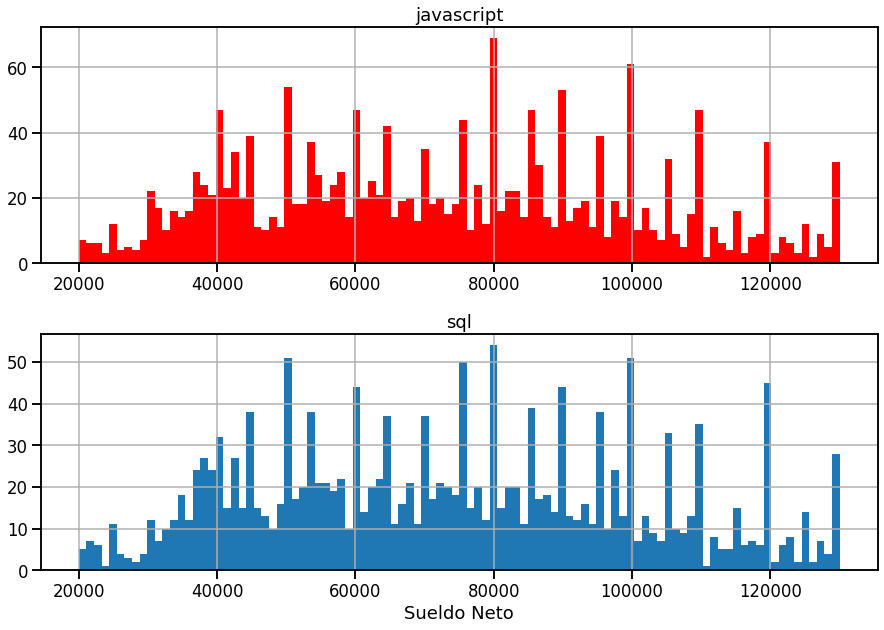

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15,10))

df1.hist('javascript', bins=100, ax=axes[0], color='red')
df2.hist('sql', bins=100, ax=axes[1])
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Sueldo Neto')

Text(0.5, 0, 'Sueldo Neto')

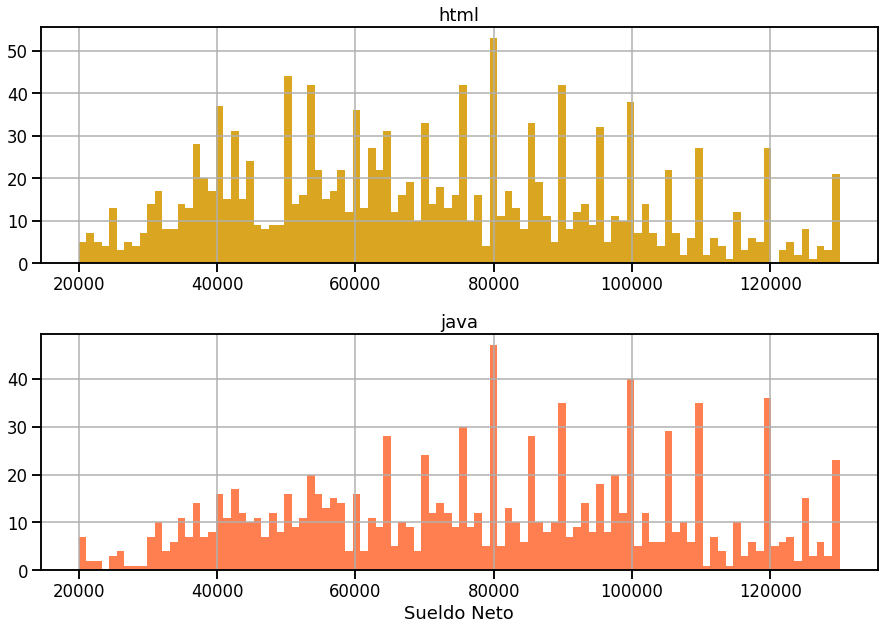

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15,10))

df3.hist('html', bins=100, ax=axes[0], color='goldenrod')
df4.hist('java', bins=100, ax=axes[1], color='coral')
plt.xlabel('Sueldo Neto')

Text(0.5, 0, 'Sueldo Neto')

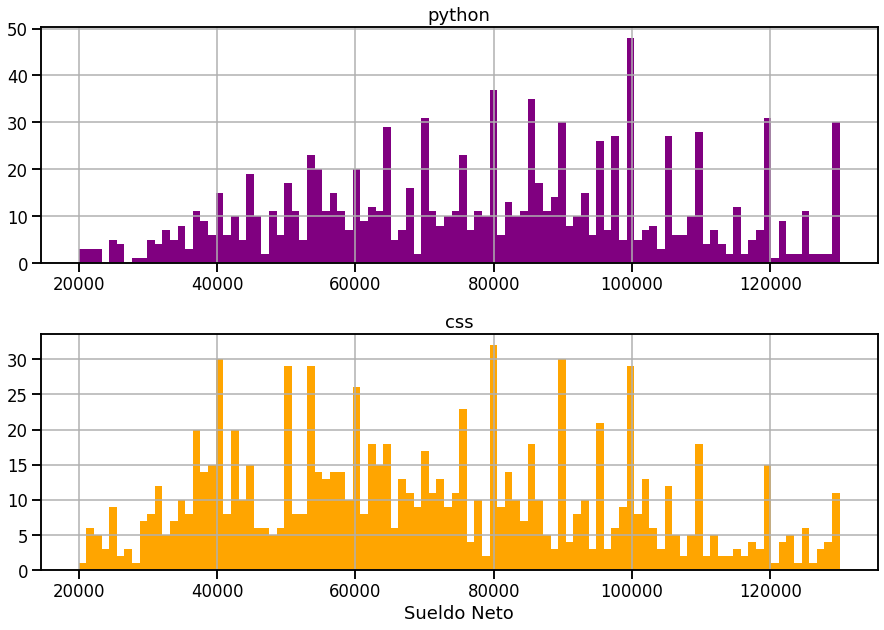

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15,10))


df5.hist('python', bins=100, ax=axes[0], color='purple')
df6.hist('css', bins=100, ax=axes[1], color='orange')
plt.xlabel('Sueldo Neto')

Text(0.5, 0, 'Sueldo Neto')

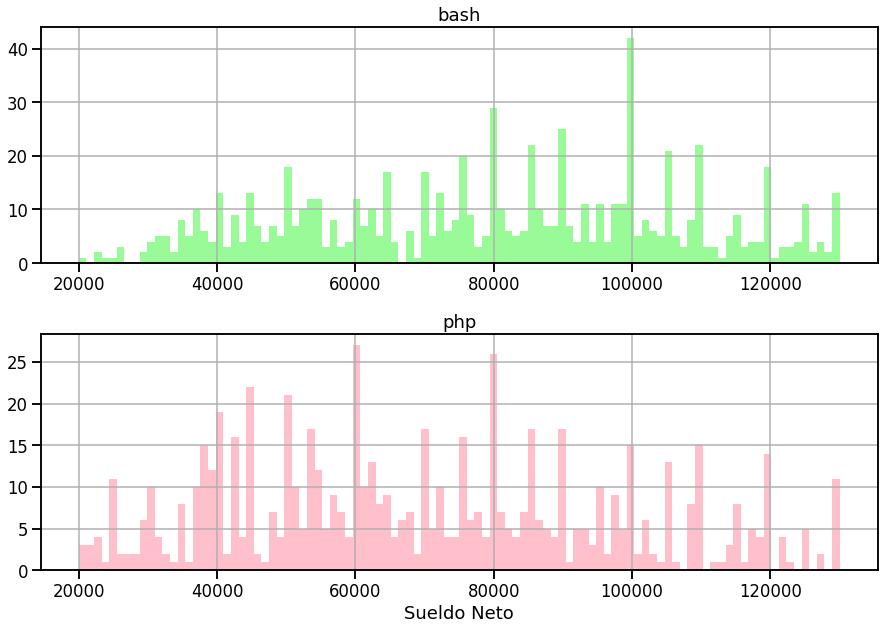

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15,10))

df7.hist('bash', bins=100, ax=axes[0], color='palegreen')
df8.hist('php', bins=100, ax=axes[1], color='pink')
plt.xlabel('Sueldo Neto')

Text(0.5, 0, 'Sueldo Neto')

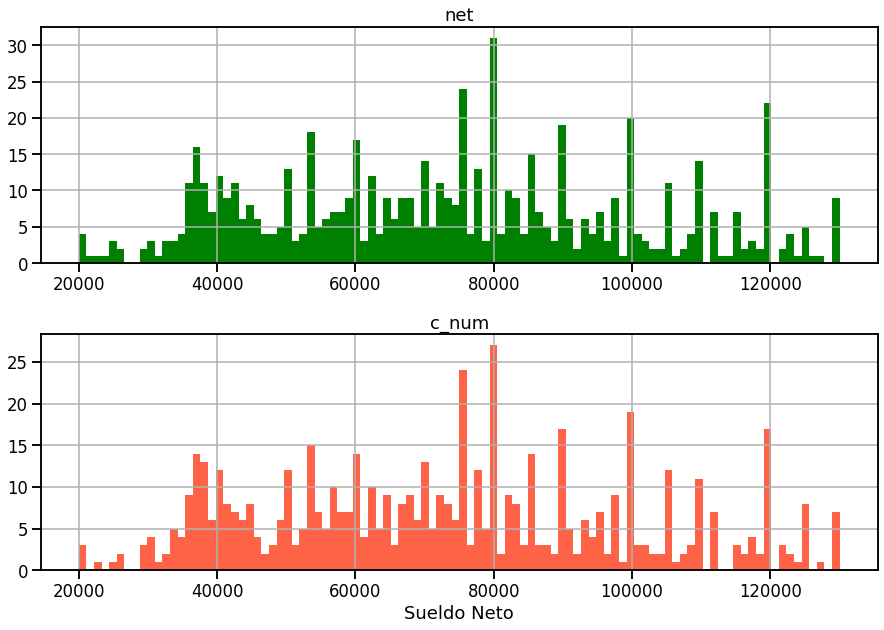

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15,10))

df9.hist('net', bins=100, ax=axes[0], color='green')
df10.hist('c_num', bins=100, ax=axes[1], color='tomato')
plt.xlabel('Sueldo Neto')

Los histogramas anteriores son similares entre sí, cambiando principalmente los sueldos "más frecuentes" para un cierto lenguaje de programación.

In [ ]:
# Se presenta el sueldo promedio de cada lenguaje ordenado de mayor a menor
round(df_lang[df_lang['programming_language'].isin(main_lang)].groupby('programming_language').mean().sort_values
      (by='salary_monthly_NETO', ascending=False),2)

,salary_monthly_NETO
programming_language,
bash/shell,79607.79
python,79356.91
java,78618.50
sql,73872.53
.net,73852.85
c#,73355.88
javascript,73050.95
html,70498.86
css,70284.47


El sueldo promedio más alto (79.607 pesos) corresponde al lenguaje bash/shell (teniendo en cuenta el df_lang)

In [ ]:
# Se presenta la mediana de cada lenguaje ordenado de mayor a menor
round(df_lang[df_lang['programming_language'].isin(main_lang)].groupby('programming_language').median().sort_values
      (by='salary_monthly_NETO', ascending=False),2)

,salary_monthly_NETO
programming_language,
bash/shell,80564.0
java,80000.0
python,80000.0
.net,74000.0
c#,73200.0
sql,73095.0
javascript,72000.0
html,69000.0
css,68000.0


La mediana más alta (80.564 pesos) corresponde nuevamente al lenguaje bash/shell (teniendo en cuenta el df_lang)

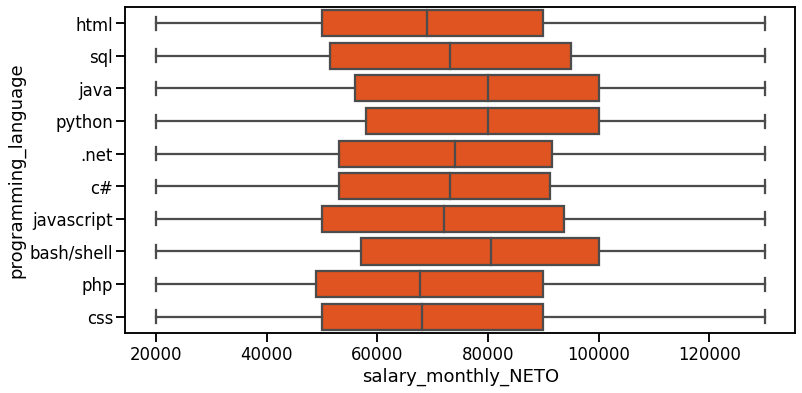

In [ ]:
#Se presentan los boxplot para cada uno de los diez lenguajes más populares
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df_lang[df_lang['programming_language'].isin(main_lang)].sort_values(by='salary_monthly_NETO', ascending=True), x='salary_monthly_NETO', y='programming_language',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

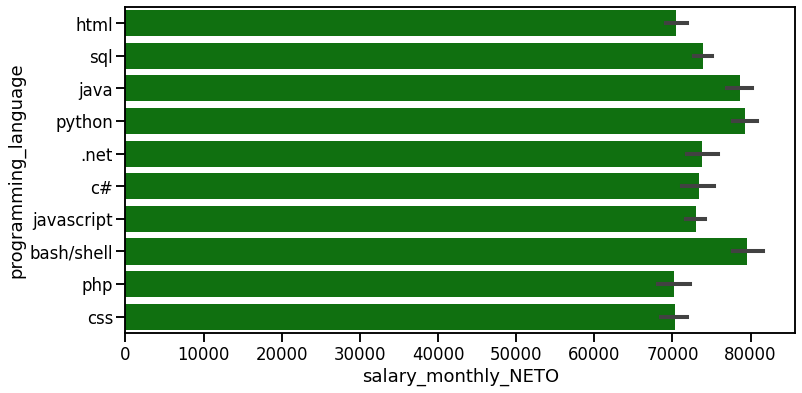

In [ ]:
# Este gráfico de barras muestra los sueldos medios de cada lenguaje. La línea negra sobre cada barra indica el intervalo de confianza en el que
# se encuentra le media. 
plt.figure(figsize=(12, 6))
seaborn.barplot(data=df_lang[df_lang['programming_language'].isin(main_lang)].sort_values(by='salary_monthly_NETO', ascending=True), x='salary_monthly_NETO', y='programming_language',
                color='green')
plt.ticklabel_format(style='plain', axis='x')

# Probabilidad condicional de salarios altos según lenguaje de programación

In [ ]:
# Se calcula el sueldo promedio de la base modificada con el data frame que contiene los valores maximo y minimo
avg_salary = df_modif['salary_monthly_NETO'].mean()
avg_salary

73440.94539054365

In [ ]:
# Se calcula la probabilidad de que un sueldo esté por encima del sueldo promedio
prob_above_avg = len(df_lang[df_lang['salary_monthly_NETO'] >= avg_salary]) / len(df_lang)  
prob_above_avg

0.5144932800581185

La probablidad de ganar más que el sueldo promedio (73.440 pesos) en el data frame estudiado (df_lang) es del 51.45%
*************************************************

In [ ]:
# Se crean variables que son listas de booleanos que indican True cuando el salario es mayor al salario promedio
# y otras que indican True cuando el lenguaje de programación es alguno de los principales

is_above_avg = df_lang['salary_monthly_NETO'] > avg_salary

lang_python = (df_lang['programming_language'] == 'python')
lang_bash = (df_lang['programming_language'] == 'bash/shell')
lang_java = (df_lang['programming_language'] == 'java')
lang_c_num = (df_lang['programming_language'] == 'c#')
lang_javascr = (df_lang['programming_language'] == 'javascript')
lang_sql = (df_lang['programming_language'] == 'sql')
lang_net = (df_lang['programming_language'] == '.net')
lang_php = (df_lang['programming_language'] == 'php')
lang_html = (df_lang['programming_language'] == 'html')
lang_css = (df_lang['programming_language'] == 'css')

In [ ]:
#Se calculan las probabilidades condicionales de los lenguajes de programación y el salario medio
p_condic_python = len(df_lang[is_above_avg & lang_python])/len(df_lang[lang_python])
print('La probablidad condicional de python es:', p_condic_python)
p_condic_bash = len(df_lang[is_above_avg & lang_bash])/len(df_lang[lang_bash])
print('La probablidad condicional de bash/shell es:',p_condic_bash)
p_condic_java = len(df_lang[is_above_avg & lang_java])/len(df_lang[lang_java])
print('La probablidad condicional de java es:',p_condic_java)
p_condic_c_num = len(df_lang[is_above_avg & lang_c_num])/len(df_lang[lang_c_num])
print('La probablidad condicional de C# es:',p_condic_c_num)
p_condic_javascr = len(df_lang[is_above_avg & lang_javascr])/len(df_lang[lang_javascr])
print('La probablidad condicional de javascript es:',p_condic_javascr)
p_condic_sql = len(df_lang[is_above_avg & lang_sql])/len(df_lang[lang_sql])
print('La probablidad condicional de sql es:',p_condic_sql)
p_condic_net = len(df_lang[is_above_avg & lang_net])/len(df_lang[lang_net])
print('La probablidad condicional de net es:',p_condic_net)
p_condic_php = len(df_lang[is_above_avg & lang_php])/len(df_lang[lang_php])
print('La probablidad condicional de php es:',p_condic_php)
p_condic_html = len(df_lang[is_above_avg & lang_html])/len(df_lang[lang_html])
print('La probablidad condicional de html es:',p_condic_html)
p_condic_css = len(df_lang[is_above_avg & lang_css])/len(df_lang[lang_css])
print('La probablidad condicional de css es:',p_condic_css)

La probablidad condicional de python es: 0.5847145488029466
La probablidad condicional de bash/shell es: 0.5997357992073976
La probablidad condicional de java es: 0.5727190605239386
La probablidad condicional de C# es: 0.4957410562180579
La probablidad condicional de javascript es: 0.4887611082070047
La probablidad condicional de sql es: 0.49598163030998854
La probablidad condicional de net es: 0.5053763440860215
La probablidad condicional de php es: 0.4371345029239766
La probablidad condicional de html es: 0.442320819112628
La probablidad condicional de css es: 0.434826883910387


Analizando estos valores, los lenguajes que incrementan la probabilidad de ganar más del sueldo promedio son:

1.   Bash/Shell  (0.5997 versus 0.5145)
2.   Python (0.5847 versus 0.5145)
3.   Java (0.5727 versus 0.5145)

In [ ]:
# Se crea un diccionario llamado "data" donde la key es el lenguaje y el value es la probabilidad condicional
main_lang = ['javascript', 'sql', 'html', 'java', 'python', 'css', 'bash/shell', 'php', '.net', 'c#']
values = [p_condic_javascr, p_condic_sql, p_condic_html, p_condic_java, p_condic_python, 
          p_condic_css, p_condic_bash, p_condic_php, p_condic_net, p_condic_c_num]

data = {}
for key in main_lang:
    for value in values:
        data[key] = value
        values.remove(value)
        break 

In [ ]:
data

{'.net': 0.5053763440860215,
 'bash/shell': 0.5997357992073976,
 'c#': 0.4957410562180579,
 'css': 0.434826883910387,
 'html': 0.442320819112628,
 'java': 0.5727190605239386,
 'javascript': 0.4887611082070047,
 'php': 0.4371345029239766,
 'python': 0.5847145488029466,
 'sql': 0.49598163030998854}

In [ ]:
# Se ordenan los valores del diccionario de mayor a menor
data
sorted_data = {}
sorted_keys = sorted(data, key=data.get)  
for w in sorted_keys:
    sorted_data[w] = data[w]

print(sorted_data)

{'css': 0.434826883910387, 'php': 0.4371345029239766, 'html': 0.442320819112628, 'javascript': 0.4887611082070047, 'c#': 0.4957410562180579, 'sql': 0.49598163030998854, '.net': 0.5053763440860215, 'java': 0.5727190605239386, 'python': 0.5847145488029466, 'bash/shell': 0.5997357992073976}


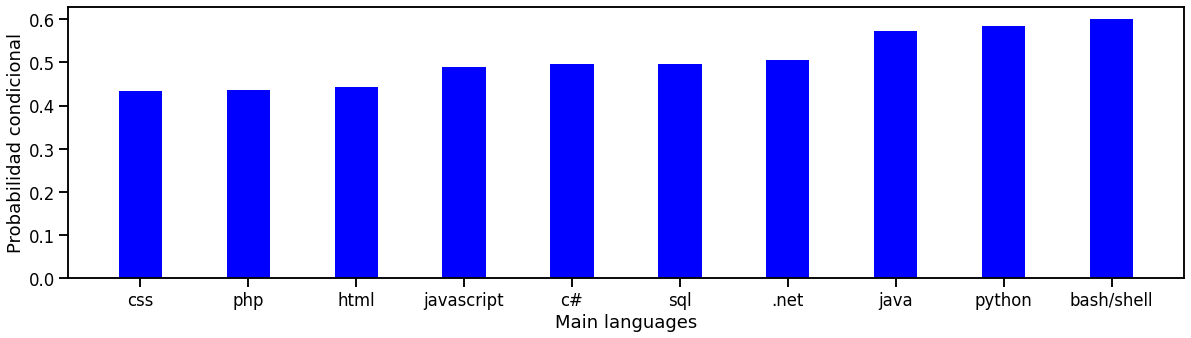

In [ ]:
#Se grafican las probabilidades de tener un sueldo mayor al promedio dado 
#que la persona sabe cada uno de los lenguajes:
languages = list(sorted_data.keys())
values = list(sorted_data.values())

fig = plt.figure(figsize = (20, 5))

plt.bar(languages, values, color ='blue',
        width = 0.4)
plt.xlabel("Main languages")
plt.ylabel("Probabilidad condicional")
plt.show()


1.   Bash/Shell  (0.5997 versus 0.5145)
2.   Python (0.5847 versus 0.5145)
3.   Java (0.5727 versus 0.5145)

Por lo tanto la probabilidad de tener un sueldo mayor al sueldo promedio es mayor si se conocen esos lenguajes de programación.
*************************************************



Es interesante tambien por ejemplo, analizar cómo son las probabilidades condicionales de los lenguajes de programación pero ahora considerando que se quiere ganar un 25% más del valor del sueldo promedio:

In [ ]:
# Se calcula un sueldo sea un 25% mayor que el sueldo promedio
quarter_plus_avg = avg_salary + 0.25*avg_salary
quarter_plus_avg

91801.18173817957

In [ ]:
# Se calcula la probabilidad de que un sueldo sea un 25% mayor que el sueldo promedio
prob_above_quarter_plus= len(df_lang[df_lang['salary_monthly_NETO'] >= quarter_plus_avg]) /len(df_lang)  
prob_above_quarter_plus

0.289647657101344

La probablidad de ganar un 25% más que el sueldo promedio (91.801 pesos) en el data frame estudiado es del 28.96%
*************************************************

In [ ]:
#Se calculan las probabilidades condicionales de los lenguajes de programación y el salario un 25% mayor al sueldo medio:

is_above_quarter_plus = df_lang['salary_monthly_NETO'] > quarter_plus_avg

p_condic_python = len(df_lang[is_above_quarter_plus & lang_python])/len(df_lang[lang_python])
print('La probablidad condicional de python es:', p_condic_python)
p_condic_bash = len(df_lang[is_above_quarter_plus & lang_bash])/len(df_lang[lang_bash])
print('La probablidad condicional de bash/shell es:',p_condic_bash)
p_condic_java = len(df_lang[is_above_quarter_plus & lang_java])/len(df_lang[lang_java])
print('La probablidad condicional de java es:',p_condic_java)
p_condic_c_num = len(df_lang[is_above_quarter_plus & lang_c_num])/len(df_lang[lang_c_num])
print('La probablidad condicional de C# es:',p_condic_c_num)
p_condic_javascr = len(df_lang[is_above_quarter_plus & lang_javascr])/len(df_lang[lang_javascr])
print('La probablidad condicional de javascript es:',p_condic_javascr)
p_condic_sql = len(df_lang[is_above_quarter_plus & lang_sql])/len(df_lang[lang_sql])
print('La probablidad condicional de sql es:',p_condic_sql)
p_condic_net = len(df_lang[is_above_quarter_plus & lang_net])/len(df_lang[lang_net])
print('La probablidad condicional de net es:',p_condic_net)
p_condic_php = len(df_lang[is_above_quarter_plus & lang_php])/len(df_lang[lang_php])
print('La probablidad condicional de php es:',p_condic_php)
p_condic_html = len(df_lang[is_above_quarter_plus & lang_html])/len(df_lang[lang_html])
print('La probablidad condicional de html es:',p_condic_html)
p_condic_css = len(df_lang[is_above_quarter_plus & lang_css])/len(df_lang[lang_css])
print('La probablidad condicional de css es:',p_condic_css)

La probablidad condicional de python es: 0.34898710865561694
La probablidad condicional de bash/shell es: 0.3619550858652576
La probablidad condicional de java es: 0.34959349593495936
La probablidad condicional de C# es: 0.24872231686541738
La probablidad condicional de javascript es: 0.2692106638787245
La probablidad condicional de sql es: 0.2766934557979334
La probablidad condicional de net es: 0.250384024577573
La probablidad condicional de php es: 0.23684210526315788
La probablidad condicional de html es: 0.23208191126279865
La probablidad condicional de css es: 0.23930753564154786


Analizando estos valores, los lenguajes que incrementan la probabilidad de ganar más del 25% del sueldo promedio son:

1.   Bash/Shell  (0.3619 versus 0.2896)
2.   Java (0.3496 versus 0.2896)
3.   Python (0.3490 versus 0.2896)


Se mantiene la misma tendencia en los lenguajes de programación, si se considera la probabilidad de ganar un sueldo que es un 25% mayor al sueldo promedio.
*************************************************

# ANALISIS ANEXO

# a) Subpoblación con salarios mayores a valor máximo elegido

Se realiza un análisis adicional para determinar qué sucede con la subpoblación de programadores que ganan más del salario máximo definido previamente de 130.000 pesos

Se crea un nuevo dataframe (df_modif_1) con esta subpoblación.

In [ ]:
# Se define el nuevo dataframe a analizar incluyendo solo los valores mayores al limite superior
df_modif_1 = df[(df['salary_monthly_NETO'] > 130000)]


In [ ]:
df_modif_1.shape

(823, 48)

Se puede ver que hay 823 programadores que cobran más que el valor máximo definido.
Se repite el análisis previo para esta sub-población y se busca analizar si se repiten las tendencias observadas para los lenguajes de programación "mejores pagos"

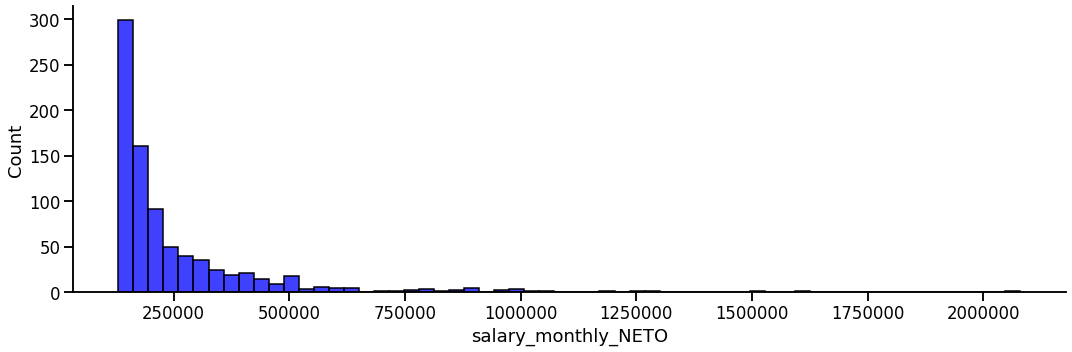

In [ ]:
#VISUALIZACIÓN DE DATOS: Histograma de columna "salary_neto" para subpoblación de programadores que ganan más de 150.000 pesos
seaborn.displot(df_modif_1["salary_monthly_NETO"], aspect=3, bins = 60, color='blue') 
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
df_modif_1[['salary_monthly_NETO']].describe().round()

,salary_monthly_NETO
count,823.0
mean,248744.0
std,184056.0
min,130401.0
25%,150000.0
50%,180000.0
75%,280000.0
max,2080000.0


In [ ]:
df_modif_1['salary_monthly_NETO'].median()

180000.0

In [ ]:
df_modif_1.salary_monthly_NETO.min(), df_modif_1.salary_monthly_NETO.max()

(130401.0, 2080000.0)

Podemos ver que en el df con la subpoblación analizada, el valor mínimo de salario neto es de 130.401 pesos y el máximo de 2.080.000 pesos. Valor que afecta el cálculo de la media.

Para poder calcular las probabilidades condicionales más adelante, asumimos que el valor máximo de salario para esta sub-población es un dato atípico y no es representativo de la misma, por lo tanto lo vamos a excluir del análisis. 

In [ ]:
#Eliminación de outlier superior en sub-población 
df_modif_1 = df[(df['salary_monthly_NETO'] > 130000) & (df['salary_monthly_NETO'] < 2080000.0)]
df_modif_1.shape

(822, 48)

La subpoblación ahora del df_modif_1 entonces tiene 822 programadores.

In [ ]:
df_modif_1[['salary_monthly_NETO']].describe().round()

,salary_monthly_NETO
count,822.0
mean,246516.0
std,172708.0
min,130401.0
25%,150000.0
50%,180000.0
75%,279750.0
max,1600000.0


In [ ]:
df_modif_1['salary_monthly_NETO'].median()

180000.0

In [ ]:
df_modif_1.salary_monthly_NETO.min(), df_modif_1.salary_monthly_NETO.max()

(130401.0, 1600000.0)

Si bien se eliminó el valor atípico de 2.080.000 pesos (el nuevo valor máximo sigue siendo muy superior a la media de los datos 1.600.000 pesos).

La distribución de los sueldos de esta sub-población NO es simétrica, ya que sigue existiendo la cola hacia el lado derecho en el histograma mostrado previamente.

Los valores de la media (246.516 pesos) y mediana (180.000) son muy diferentes.

Sin embargo se tomarán todos los datos (822 respuestas) para el análisis de las probabilidades condicionales, considerando que es una muestra muy pequeña y NO es representativa de gran parte de la población encuestada (analizada previamente)

Simplemente es de interés detectar cuáles son los lenguajes de programación asociados a esta subpoblación de programadores que ganan más que 130.000 pesos
*************************************************

# b) Lenguajes más populares en sub-población 

Nuevamente, es de interés separar la lista de lenguajes de programación de modo que se pueda contabilizar sus frecuencias en la sub-población:

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df_modif_1.loc[:, 'cured_programming_languages'] = df_modif_1.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang_1 = df_modif_1.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df_modif_1[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [ ]:
print(df_modif_1.shape)
print(df_lang_1.shape)

(822, 49)
(2825, 4)


Se creó un data frame (df_lang_1) que tiene separados los lenguajes de programación, se pasó de un df de 822 respuestas a uno de 2825, teniendo en cuenta que algunos programadores manejan más de un lenguaje de programación.

In [ ]:
# Se quiere obtener los 20 lenguajes de programación más populares en el df_lang_1
language_count_1 = df_lang_1.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count_1[:10]

,language,frequency
0,javascript,396
1,python,286
2,sql,257
3,java,245
4,html,239
5,bash/shell,181
6,css,156
7,typescript,143
8,php,135
9,.net,105


In [ ]:
language_count_1 = language_count_1.sort_values(by='frequency',ascending=False)

In [ ]:
relative_frequency_1=language_count_1[["frequency"]].cumsum()
total_frequency_1=language_count_1[["frequency"]].sum()
language_count_1["cum_frequency"]=relative_frequency_1/total_frequency_1*100

In [ ]:
language_count_1[:15]

,language,frequency,cum_frequency
0,javascript,396,14.017699
1,python,286,24.141593
2,sql,257,33.238938
3,java,245,41.911504
4,html,239,50.371681
5,bash/shell,181,56.778761
6,css,156,62.300885
7,typescript,143,67.362832
8,php,135,72.141593
9,.net,105,75.858407


Analizando esta tabla se puede concluir que el 20% de los lenguajes de programación que representan (aproximadamente) el 80% del total de las frecuencias más populares son los primeros 11, es decir desde "Javascript" hasta "go". 

Se elige este listado para estudiar si el nivel de salario está relacionado con el lenguaje de programación.


# c) Salarios asociados a los lenguajes más populares en la subpoblación

In [ ]:
# Se presenta el sueldo promedio de cada lenguaje ordenado de mayor a menor
round(df_lang_1[df_lang_1['programming_language'].isin(main_lang)].groupby('programming_language').mean().sort_values
      (by='salary_monthly_NETO', ascending=False),2)

,salary_monthly_NETO
programming_language,
c#,253326.78
css,251590.68
javascript,251582.09
python,246996.22
html,246585.93
bash/shell,243984.84
php,238785.40
sql,238766.67
.net,223370.43


In [ ]:
# Se presenta la mediana de cada lenguaje ordenado de mayor a menor
round(df_lang_1[df_lang_1['programming_language'].isin(main_lang)].groupby('programming_language').median().sort_values
      (by='salary_monthly_NETO', ascending=False),2)

,salary_monthly_NETO
programming_language,
javascript,195000.0
c#,186000.0
html,186000.0
python,185000.0
bash/shell,180000.0
css,180000.0
php,180000.0
sql,180000.0
.net,175000.0


# d) Probabilidades condicionales en sub-población

In [ ]:
# Se calcula el sueldo promedio de la base modificada en la sub-población
avg_salary_1 = df_modif_1['salary_monthly_NETO'].mean()
avg_salary_1

# Se calcula la probabilidad de que un sueldo esté por encima del sueldo promedio
prob_above_avg_1 = len(df_lang_1[df_lang_1['salary_monthly_NETO'] > avg_salary_1]) / len(df_lang_1)  
prob_above_avg_1

# Se calcula la "mediana" de la base modificada en la sub-población
median_salary_1 = df_modif_1['salary_monthly_NETO'].median()
median_salary_1

# Calculo la probabilidad de que un sueldo esté por encima de la mediana
prob_above_med_1 = len(df_lang_1[df_lang_1['salary_monthly_NETO'] > median_salary_1]) / len(df_lang_1)  
prob_above_med_1

print('El sueldo promedio en la sub-población es:', avg_salary_1)
print('La mediana de la sub-población es:', median_salary_1)
print('La probablidad de que un sueldo esté por encima del sueldo promedio es:',prob_above_avg_1)
print('La probabilidad de que un sueldo esté por encima de la mediana es:',prob_above_med_1)

El sueldo promedio en la sub-población es: 246516.34040145986
La mediana de la sub-población es: 180000.0
La probablidad de que un sueldo esté por encima del sueldo promedio es: 0.30796460176991153
La probabilidad de que un sueldo esté por encima de la mediana es: 0.5076106194690265


La probabilidad de que algún programador dentro de la sub-población gane más que el promedio es del 30.79%. Siendo el promedio 246.516 pesos.

La probabilidad de que se gane más que la mediana es del 50.76%. Siendo el valor de la mediana 180.000 pesos.

Se decide calcular las probabilidades condicionales teniendo en cuenta la MEDIA del sueldo de esta sub-población (ya que es un valor superior).
*************************************************

In [ ]:
# Se crean variables que son listas de booleanos que indican True cuando el salario es mayor al salario promedio
# y otras que indican True cuando el lenguaje de programación es alguno de los principales
is_above_avg_1 = df_lang_1['salary_monthly_NETO'] > avg_salary_1

lang_python_1 = (df_lang_1['programming_language'] == 'python')
lang_bash_1 = (df_lang_1['programming_language'] == 'bash/shell')
lang_java_1 = (df_lang_1['programming_language'] == 'java')
lang_typescript_1 = (df_lang_1['programming_language'] == 'typescript')
lang_javascr_1 = (df_lang_1['programming_language'] == 'javascript')
lang_sql_1 = (df_lang_1['programming_language'] == 'sql')
lang_net_1 = (df_lang_1['programming_language'] == '.net')
lang_php_1 = (df_lang_1['programming_language'] == 'php')
lang_html_1 = (df_lang_1['programming_language'] == 'html')
lang_css_1 = (df_lang_1['programming_language'] == 'css')
lang_go_1 = (df_lang_1['programming_language'] == 'go')

In [ ]:
#Se calculan las probabilidades condicionales de los lenguajes de programación y el salario
p_condic_python_1 = len(df_lang_1[is_above_avg_1 & lang_python_1])/len(df_lang_1[lang_python_1])
print('La probablidad condicional de python es:', p_condic_python_1)

p_condic_bash_1 = len(df_lang_1[is_above_avg_1 & lang_bash_1])/len(df_lang_1[lang_bash_1])
print('La probablidad condicional de bash/shell es:', p_condic_bash_1)

p_condic_java_1 = len(df_lang_1[is_above_avg_1 & lang_java_1])/len(df_lang_1[lang_java_1])
print('La probablidad condicional de java es:', p_condic_java_1)

p_condic_typescript_1 = len(df_lang_1[is_above_avg_1 & lang_typescript_1])/len(df_lang_1[lang_typescript_1])
print('La probablidad condicional de typescript es:', p_condic_typescript_1)

p_condic_javascr_1 = len(df_lang_1[is_above_avg_1 & lang_javascr_1])/len(df_lang_1[lang_javascr_1])
print('La probablidad condicional de javascript es:', p_condic_javascr_1)

p_condic_sql_1 = len(df_lang_1[is_above_avg_1 & lang_sql_1])/len(df_lang_1[lang_sql_1])
print('La probablidad condicional de sql es:', p_condic_sql_1)

p_condic_net_1 = len(df_lang_1[is_above_avg_1 & lang_net_1])/len(df_lang_1[lang_net_1])
print('La probablidad condicional de net es:', p_condic_net_1)

p_condic_php_1 = len(df_lang_1[is_above_avg_1 & lang_php_1])/len(df_lang_1[lang_php_1])
print('La probablidad condicional de php es:', p_condic_php_1)

p_condic_html_1 = len(df_lang_1[is_above_avg_1 & lang_html_1])/len(df_lang_1[lang_html_1])
print('La probablidad condicional de html es:', p_condic_html_1)

p_condic_css_1 = len(df_lang_1[is_above_avg_1 & lang_css_1])/len(df_lang_1[lang_css_1])
print('La probablidad condicional de css es:', p_condic_css_1)

p_condic_go_1 = len(df_lang_1[is_above_avg_1 & lang_go_1])/len(df_lang_1[lang_go_1])
print('La probablidad condicional de go es:', p_condic_go_1)

La probablidad condicional de python es: 0.3076923076923077
La probablidad condicional de bash/shell es: 0.26519337016574585
La probablidad condicional de java es: 0.20816326530612245
La probablidad condicional de typescript es: 0.32867132867132864
La probablidad condicional de javascript es: 0.3484848484848485
La probablidad condicional de sql es: 0.29961089494163423
La probablidad condicional de net es: 0.3047619047619048
La probablidad condicional de php es: 0.28888888888888886
La probablidad condicional de html es: 0.3389121338912134
La probablidad condicional de css es: 0.33974358974358976
La probablidad condicional de go es: 0.3333333333333333


In [ ]:
# Se crea un diccionario llamado "data" donde la key es el lenguaje y el value es la probabilidad condicional
main_lang_1 = ['javascript', 'sql', 'html', 'java', 'python', 'css', 'bash/shell', 'php', '.net', 'typescript','go']
values_1 = [p_condic_javascr_1, p_condic_sql_1, p_condic_html_1, p_condic_java_1, p_condic_python_1, 
          p_condic_css_1, p_condic_bash_1, p_condic_php_1, p_condic_net_1, p_condic_typescript_1, p_condic_go_1]

data_1 = {}
for key in main_lang_1:
    for value in values_1:
        data_1[key] = value
        values_1.remove(value)
        break 

In [ ]:
data_1

{'.net': 0.3047619047619048,
 'bash/shell': 0.26519337016574585,
 'css': 0.33974358974358976,
 'go': 0.3333333333333333,
 'html': 0.3389121338912134,
 'java': 0.20816326530612245,
 'javascript': 0.3484848484848485,
 'php': 0.28888888888888886,
 'python': 0.3076923076923077,
 'sql': 0.29961089494163423,
 'typescript': 0.32867132867132864}

In [ ]:
prob_above_avg_1

0.30796460176991153

In [ ]:
# Se ordenan los valores del diccionario de mayor a menor
data_1
sorted_data_1 = {}
sorted_keys_1 = sorted(data_1, key=data_1.get)  
for w in sorted_keys_1:
    sorted_data_1[w] = data_1[w]

print(sorted_data_1)

{'java': 0.20816326530612245, 'bash/shell': 0.26519337016574585, 'php': 0.28888888888888886, 'sql': 0.29961089494163423, '.net': 0.3047619047619048, 'python': 0.3076923076923077, 'typescript': 0.32867132867132864, 'go': 0.3333333333333333, 'html': 0.3389121338912134, 'css': 0.33974358974358976, 'javascript': 0.3484848484848485}


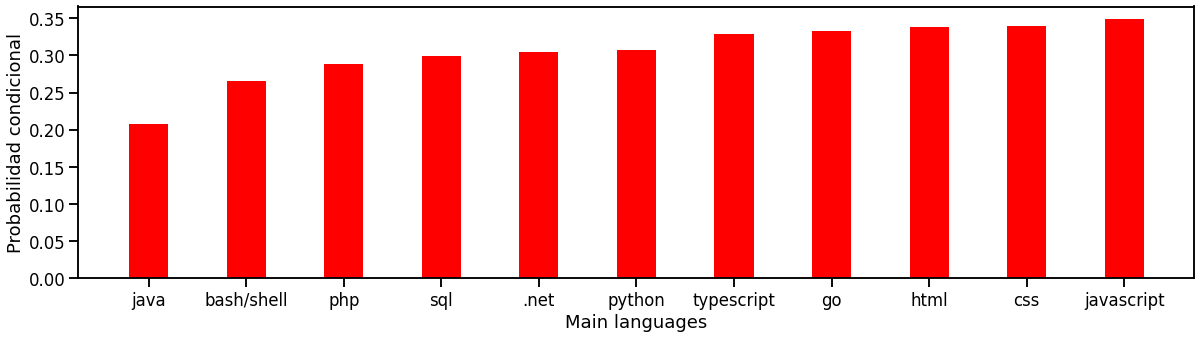

In [ ]:
#Se grafican las probabilidades condicionales calculadas previamente  
languages_1 = list(sorted_data_1.keys())
values_1 = list(sorted_data_1.values())

fig = plt.figure(figsize = (20, 5))
plt.bar(languages_1, values_1, color ='red',
        width = 0.4)
plt.xlabel("Main languages")
plt.ylabel("Probabilidad condicional")
plt.show()

Los lenguajes de programación en los cuales la probabilidad condicional es MAYOR a la probabilidad de ganar más que el promedio (0.3079) sabiendo ese lenguaje  son:

*   Javascript=0.3485
*   CSS=0.3397
*   HTML=0.3389
*   Go=0.3333
*   Typescript=0.3287

El resto de los lenguajes se "descartan" como lenguajes asociado a los mejores salarios por tener una probabilidad muy cercana a 0.3079 (probabilidad de ganar más que el promedio). No se puede determinar si son eventos dependientes o no.
*************************************************



# CONCLUSIÓN EJERCICIO 1
*************************************************

Los lenguajes de programación asociados a los mejores salarios en la población que abarca sueldos netos desde 20.000 pesos hasta 130.000 pesos (con promedio en 73.440 pesos) son los siguientes:

1.   Bash/Shell (59.97% de probabilidad de ganar más que el promedio)
2.   Python (58.47% de probabilidad de ganar más que el promedio)
3.   Java (57.27% de probabilidad de ganar más que el promedio)

Siendo la probabilidad de ganar más que el sueldo promedio de 51.45%.

*************************************************
Analizando ahora la sub-población que tiene sueldos netos mayores a 130.000 pesos y excluyendo el valor máximo de este sub-conjunto (2.080.000 pesos). El sueldo promedio es 246.516 pesos y el listado de lenguajes que tienen una probabilidad de ganar un sueldo mayor a la del promedio es:

1.   Javascript (34.85%)
2.   CSS (33.97%)
3.   HTML (33.89%)
4.   Go (33.33%)
5.   Typescript (32.87%)

Siendo 30.79% la probabilidad de ganar más que el sueldo promedio.


Debido a que los listados de lenguajes "mejores pagos" en las dos poblaciones analizadas no coinciden. Se considera que NO se puede afirmar que existe una correlación directa entre estas dos variables, asumiendo que al menos algún lenguaje debería ser común en ambos listados (considerando TODA la población de sueldos posibles).

Como ya se hizo el análisis de "mejores salarios" con "lenguajes de programación". Sería interesante analizar la relación entre puesto de trabajo y lenguaje de programación, para luego poder inferir si los "mejores sueldos" tienen mayor relación al puesto de trabajo o al lenguaje de programación en sí mismo como ventaja competitiva.
*************************************************